<a href="https://colab.research.google.com/github/cosmin004/ML-Courses/blob/main/Convolutional%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras as k
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = k.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

5


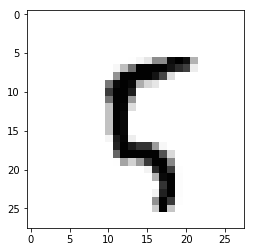

In [ ]:
index = 100
print(y_train[index])
plt.imshow(X_train[index], cmap='Greys')

## Normalizing images
In order for the neural network to work well we need to normalize our input data. For images we can do that by dividing the input data by 255. Normally we would do that with some sort of scaler, but in this case, the maximum value for a pixel is 255 and the minimum value is 0(so we can normalize by dividing the input with value = max-min). 

In [ ]:
X_train_scaled = X_train.astype('float32')
X_test_scaled = X_test.astype('float32')

X_train_scaled /= 255
X_test_scaled /= 255


In [ ]:
X_test_scaled.shape

(10000, 28, 28)

In [ ]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [ ]:
X_test_scaled.shape

(10000, 28, 28, 1)

## Building the ANN
Now we will use tensorflow and keras in order to build, train and test a convolutional neural network. We will build the network using the functional API to also view some results of the intermediate layers.

In [ ]:
visible = k.layers.Input(shape=(28, 28, 1))
conv1 = k.layers.Conv2D(64, kernel_size=3, activation='relu')(visible)
pool1 = k.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = k.layers.Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = k.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
flat = k.layers.Flatten()(pool2)
hidden1 = k.layers.Dense(100, activation='relu')(flat)
output = k.layers.Dense(10, activation='softmax')(hidden1)
model = k.models.Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=X_train_scaled,y=y_train, batch_size=512, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 21s 444us/sample - loss: 0.4904 - accuracy: 0.8709 - val_loss: 0.1232 - val_accuracy: 0.9661
Epoch 2/10
48000/48000 [==============================] - 17s 357us/sample - loss: 0.1004 - accuracy: 0.9696 - val_loss: 0.0863 - val_accuracy: 0.9739
Epoch 3/10
48000/48000 [==============================] - 17s 350us/sample - loss: 0.0676 - accuracy: 0.9795 - val_loss: 0.0620 - val_accuracy: 0.9819
Epoch 4/10
48000/48000 [==============================] - 18s 365us/sample - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0568 - val_accuracy: 0.9839
Epoch 5/10
48000/48000 [==============================] - 18s 382us/sample - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0503 - val_accuracy: 0.9855
Epoch 6/10
48000/48000 [==============================] - 18s 369us/sample - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0465 - val_accuracy: 0.9871
Epoch 7/10
48000/48000 [====================

In [ ]:
y_train.shape

(60000,)

# Model evaluation

In [ ]:
test_scores = model.evaluate(X_test_scaled, y_test, verbose=2)

10000/1 - 9s - loss: 0.0172 - accuracy: 0.9892


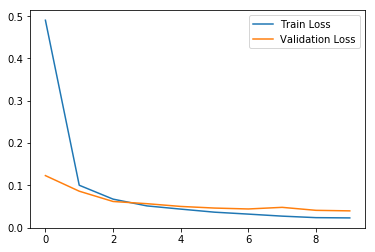

In [ ]:
plt.plot(np.arange(0, 10, 1), history.history['loss'], label='Train Loss')
plt.plot(np.arange(0, 10, 1), history.history['val_loss'], label='Validation Loss')
plt.legend()

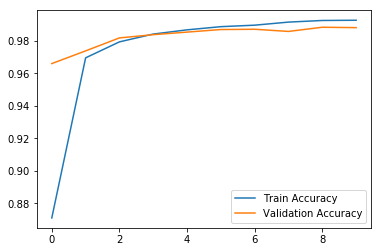

In [ ]:
plt.plot(np.arange(0, 10, 1), history.history['accuracy'], label='Train Accuracy')
plt.plot(np.arange(0, 10, 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

# Prediction insights

4


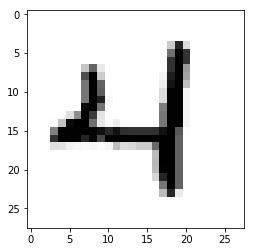

In [ ]:
index = 103
print(y_test[index])
plt.imshow(X_test[index], cmap='Greys')

In [ ]:
pred = model.predict(np.array([X_test_scaled[index]]))

In [ ]:
np.argmax(pred)

4

## First convolution layer

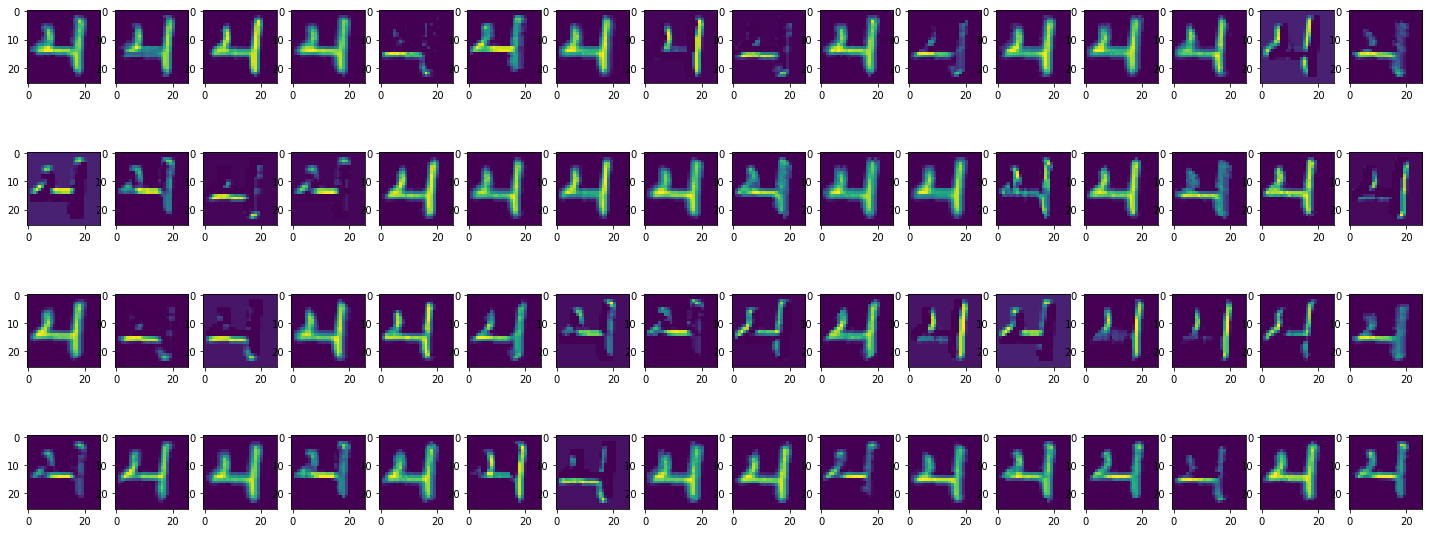

In [ ]:
fig, axes = plt.subplots(4, 16, figsize=(25,10))
ix = 0
for ax in axes:
    for ax1 in ax:
        ax1.imshow(activations[1][0,:,:,ix], cmap='viridis')
        ix += 1

## First pooling layer

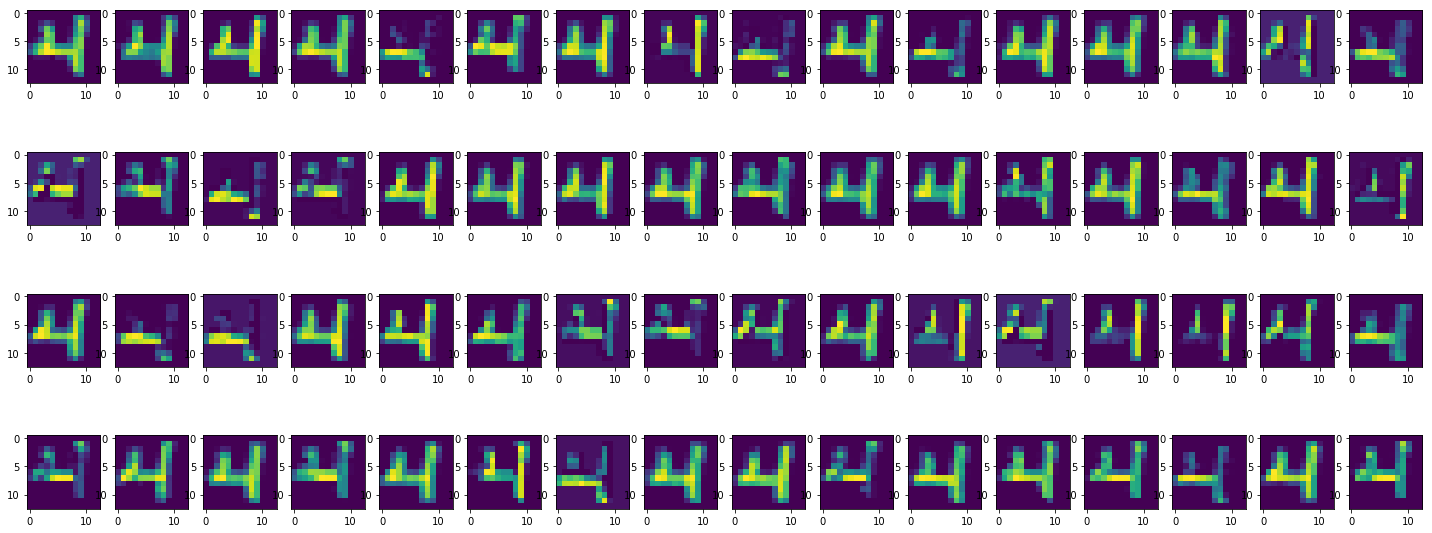

In [ ]:
fig, axes = plt.subplots(4, 16, figsize=(25,10))
ix = 0
for ax in axes:
    for ax1 in ax:
        ax1.imshow(activations[2][0,:,:,ix], cmap='viridis')
        ix += 1

## Second conv layer

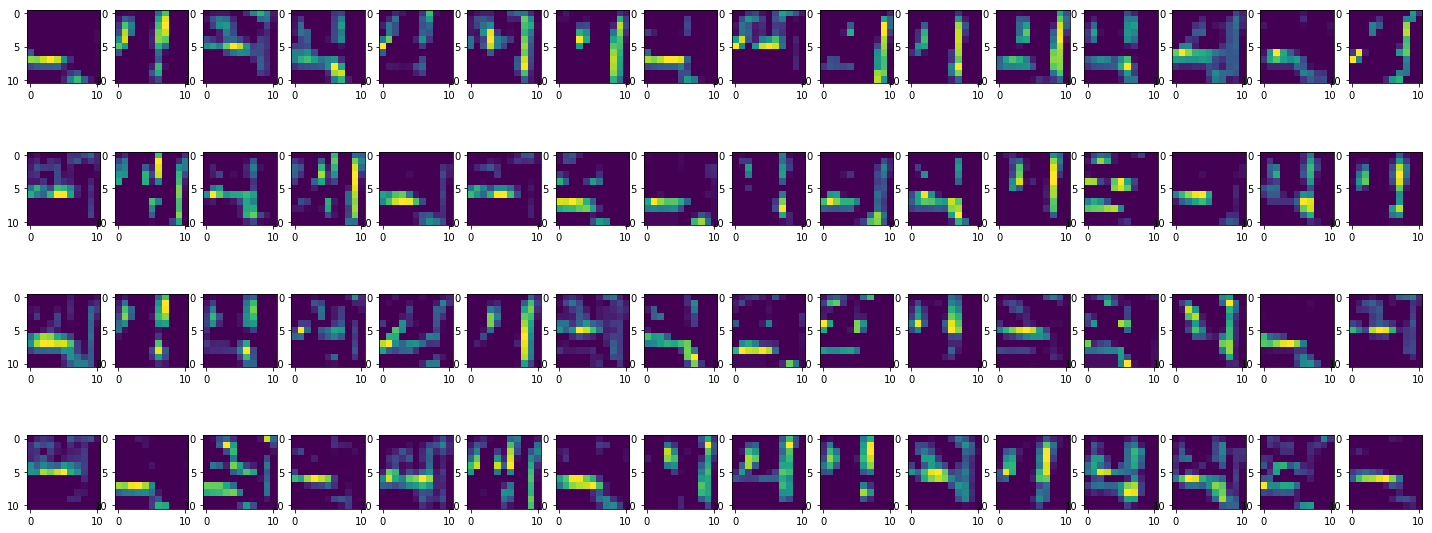

In [ ]:
fig, axes = plt.subplots(4, 16, figsize=(25,10))
ix = 0
for ax in axes:
    for ax1 in ax:
        ax1.imshow(activations[3][0,:,:,ix], cmap='viridis')
        ix += 1

## Second pooling layer

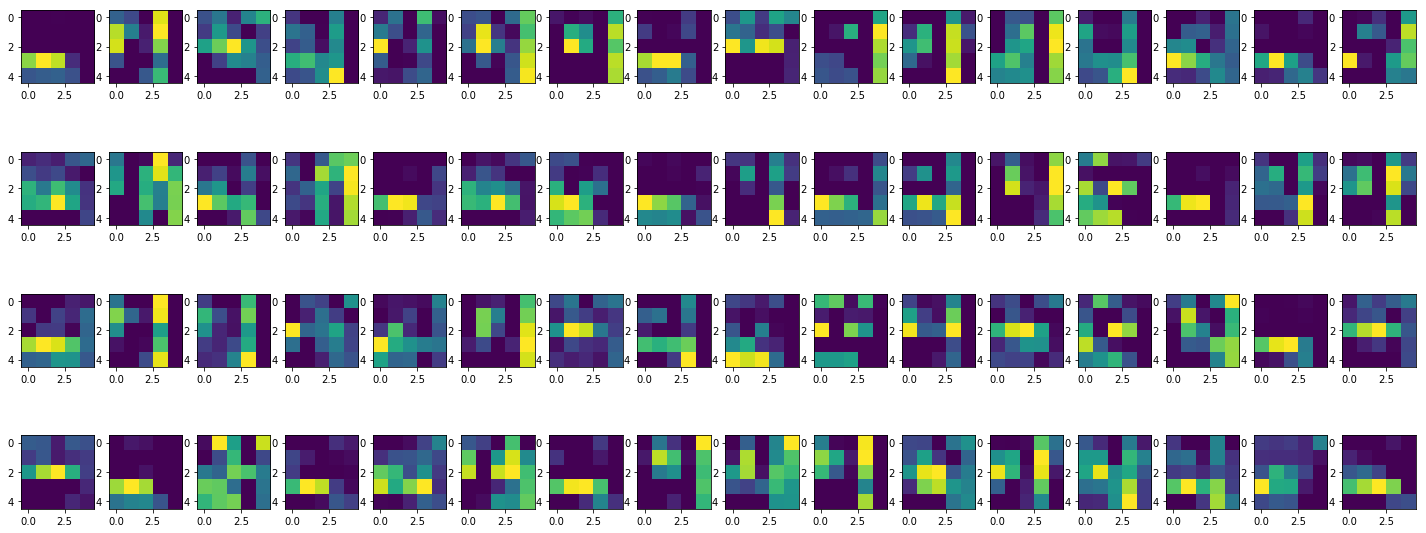

In [ ]:
fig, axes = plt.subplots(4, 16, figsize=(25,10))
ix = 0
for ax in axes:
    for ax1 in ax:
        ax1.imshow(activations[4][0,:,:,ix], cmap='viridis')
        ix += 1